In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("train.csv")


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.Age.fillna(df.Age.mean(),inplace = True)
df.Pclass.fillna(df.Pclass.median(),inplace = True)
df.Embarked = df.Embarked.map({"C":1,"Q":2,"S":3})
df.Sex = df.Sex.map({"male":1,"female":0})
df.Embarked.fillna(3,inplace = True)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3.0


In [5]:
X = df.iloc[:,[0,2,4,5,6,7,9,11]]
y = df.iloc[: , 1]






In [6]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [7])
X = onehotencoder.fit_transform(X).toarray()

In [7]:
X = X[:,1:]

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)
classifier = LogisticRegression(solver="newton-cg")
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)
y_t = classifier.predict(X_train)


from sklearn.metrics import accuracy_score
a_score = accuracy_score(y_test , y_pred)
a_score

0.7988826815642458

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train , y= y_train, scoring = "accuracy",cv = 10)
cross_score = accuracies.mean()
cross_std =accuracies.std()
cross_score
cross_std

0.039572913446330731

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = [{"solver":["newton-cg","lbfgs","liblinear","sag"]}]
parameters_2 = [{"max_iter":[100,200,300,500,1000,1000],
                 "C":[1,10,100,100]}]
lr_grid = GridSearchCV(estimator = classifier , param_grid = parameters_2,scoring= "accuracy",cv =10)
lr_grid.fit(X_train , y_train)
lr_grid.best_params_
lr_grid.best_score_

0.7837078651685393

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_features = "log2" , n_estimators = 30)
classifier.fit(X_train , y_train)
r_pred = classifier.predict(X_test)

r_ac = accuracy_score(y_test , r_pred)
r_ac

0.83240223463687146

In [13]:
parameters = [{"n_estimators":[30,31,32,33,34,35,36,37,38,39,40],
               "max_features":[ "auto","sqrt","log2"],
               
               }]
r_grid_search = GridSearchCV(estimator = classifier , param_grid = parameters, cv = 10,scoring = "accuracy")
r_grid_search.fit(X_train , y_train)
r_grid_search.best_params_
r_grid_search.best_score_

0.8202247191011236

In [14]:
r_accuracies = cross_val_score(estimator = classifier , X = X_train , y = y_train , scoring = "accuracy", cv =10)
r_accuracies.mean()

0.8118863179074447

In [15]:
from sklearn.svm import SVC
svr = SVC(kernel = "rbf", degree = 1, gamma = 0.1)
svr.fit(X_train , y_train)
svr_pred = svr.predict(X_test)
svr_score =accuracy_score(y_test , svr_pred)
svr_score

0.81005586592178769

In [16]:
parameters = [{"kernel":["linear","poly","rbf","sigmoid"],
              "degree":[1,2,3,4,5,6,7,8,9,10]}]
parameters_2 = [{"gamma":[0.01,0.1,0.2,0.25,0.3]}]
svc_grid = GridSearchCV(estimator = svr , param_grid = parameters_2 , scoring ="accuracy" , cv = 10)
svc_grid.fit(X_train , y_train)
svc_grid.best_params_

{'gamma': 0.1}

In [17]:
svc_accuracies = cross_val_score(estimator = svr , X= X_train , y = y_train , cv = 10 , scoring = "accuracy")
svc_accuracies.mean()

0.830039123630673

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15,algorithm = "auto", leaf_size = 1 , weights = "distance" )
knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
knn_score =accuracy_score(y_test , knn_pred)
knn_score

0.83240223463687146

In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn ,X = X_train , y = y_train , scoring = "accuracy", cv=10)
accuracies.mean()


0.80621395036887988

In [20]:
from sklearn.model_selection import GridSearchCV
knn_param = [{"n_neighbors":[2,3,4,5,10,15,20]}]
knn_param_2 = [{"weights":["uniform","distance"],
                "algorithm":["auto","ball_tree","kd_tree","brute"],
                "leaf_size":[10,20,30,40,50,100]}]
knn_param_3 = [{"leaf_size":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
kn_grid = GridSearchCV(estimator = knn ,param_grid = knn_param_3 , scoring = "accuracy",cv = 20)
kn_grid.fit(X_train,y_train)
kn_grid.best_params_

{'leaf_size': 1}

In [21]:
score = {}
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train , y_train)
    knn_pred = knn.predict(X_test)
    knn_score =accuracy_score(y_test , knn_pred)
    score[i] = knn_score


In [22]:
from sklearn.naive_bayes import GaussianNB
gb_classifier = GaussianNB()
gb_classifier.fit(X_train , y_train)
gb_pred = gb_classifier.predict(X_test)
gb_score = accuracy_score(y_test , gb_pred)
gb_score

0.79329608938547491

In [23]:
accuracies = cross_val_score(estimator =gb_classifier , X= X_train , y =y_train , scoring = "accuracy", cv = 10)
accuracies.mean()

0.78659177285937854

In [24]:
from xgboost import XGBClassifier
x_classifier = XGBClassifier(n_estimators = 100 , max_depth = 2)
x_classifier.fit(X_train ,y_train)
x_y_pred = x_classifier.predict(X_test)
x_score = accuracy_score(y_test , x_y_pred)
x_score

C:\Users\Mostafa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.83240223463687146

<Container object of 4 artists>

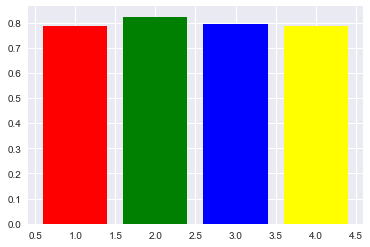

In [30]:
CL = ["LogisticRegression","RandomForestClassifier","KNeighborsClassifier","GaussianNB"]
cl = [1,2,3,4]
scores =[0.7865168539325843,0.8230337078651685,0.79365358819584175,0.78659177285937854]
%matplotlib inline
plt.bar(left= cl , height= scores, color = ["red","green","blue","yellow"])
